In [55]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error

plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# EDA

In [56]:
songs = pd.read_csv('song_data.csv')

In [57]:
songs.head()

song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0    -4.095           1       0.0294  167.060               4          0.474  
1    -6.407           0       0.0498  105.256               4          0.370  
2    -7.828           1       0.0792  123.881               4          0.324  
3    -4.938           1       0.1070  122.444               4          0.198  
4    -5.065           1       0.0313  172.011               4          0.574

In [58]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [59]:
#duplicates = songs[songs.duplicated(['song_name'], keep='first')]

In [60]:
songs = songs.drop_duplicates().reset_index(drop=True)
songs

song_name  song_popularity  song_duration_ms  \
0      Boulevard of Broken Dreams               73            262333   
1                      In The End               66            216933   
2               Seven Nation Army               76            231733   
3                      By The Way               74            216933   
4               How You Remind Me               56            223826   
...                           ...              ...               ...   
14921              Let It Breathe               60            159645   
14922                     Answers               60            205666   
14923      Sudden Love (Acoustic)               23            182211   
14924           Gentle on My Mind               55            352280   
14925                    Up to Me               60            193533   

       acousticness  danceability  energy  instrumentalness  key  liveness  \
0          0.005520         0.496   0.682          0.000029    8    0.0589   
1          0.010300         0.542   0.853          0.000000    3    0.1080   
2          0.008170         0.737   0.463          0.447000    0    0.2550   
3          0.026400         0.451   0.970          0.003550    0    0.1020   
4          0.000954         0.447   0.766          0.000000   10    0.1130   
...             ...           ...     ...               ...  ...       ...   
14921      0.893000         0.500   0.151          0.000065   11    0.1110   
14922      0.765000         0.495   0.161          0.000001   11    0.1050   
14923      0.847000         0.719   0.325          0.000000    0    0.1250   
14924      0.945000         0.488   0.326          0.015700    3    0.1190   
14925      0.911000         0.640   0.381          0.000254    4    0.1040   

       loudness  audio_mode  speechiness    tempo  time_signature  \
0        -4.095           1       0.0294  167.060               4   
1        -6.407           0       0.0498  105.256               4   
2        -7.828           1       0.0792  123.881               4   
3        -4.938           1       0.1070  122.444               4   
4        -5.065           1       0.0313  172.011               4   
...         ...         ...          ...      ...             ...   
14921   -16.107           1       0.0348  113.969               4   
14922   -14.078           0       0.0301   94.286               4   
14923   -12.222           1       0.0355  130.534               4   
14924   -12.020           1       0.0328  106.063               4   
14925   -11.790           1       0.0302   91.490               4   

       audio_valence  
0              0.474  
1              0.370  
2              0.324  
3              0.198  
4              0.574  
...              ...  
14921          0.300  
14922          0.265  
14923          0.286  
14924          0.323  
14925          0.581  

[14926 rows x 15 columns]

In [61]:
songs.tempo.sort_values()

6503       0.000
9717       0.000
14911     46.591
12682     47.953
4426      51.607
          ...   
1626     213.226
12019    213.990
11982    214.686
12849    216.115
4085     242.318
Name: tempo, Length: 14926, dtype: float64

In [62]:
songs.song_duration_ms.sort_values()

6503       12000
14413      26186
3395       31373
3414       35920
3777       50014
          ...   
13725     866889
3396     1047933
469      1233666
14281    1355938
14471    1799346
Name: song_duration_ms, Length: 14926, dtype: int64

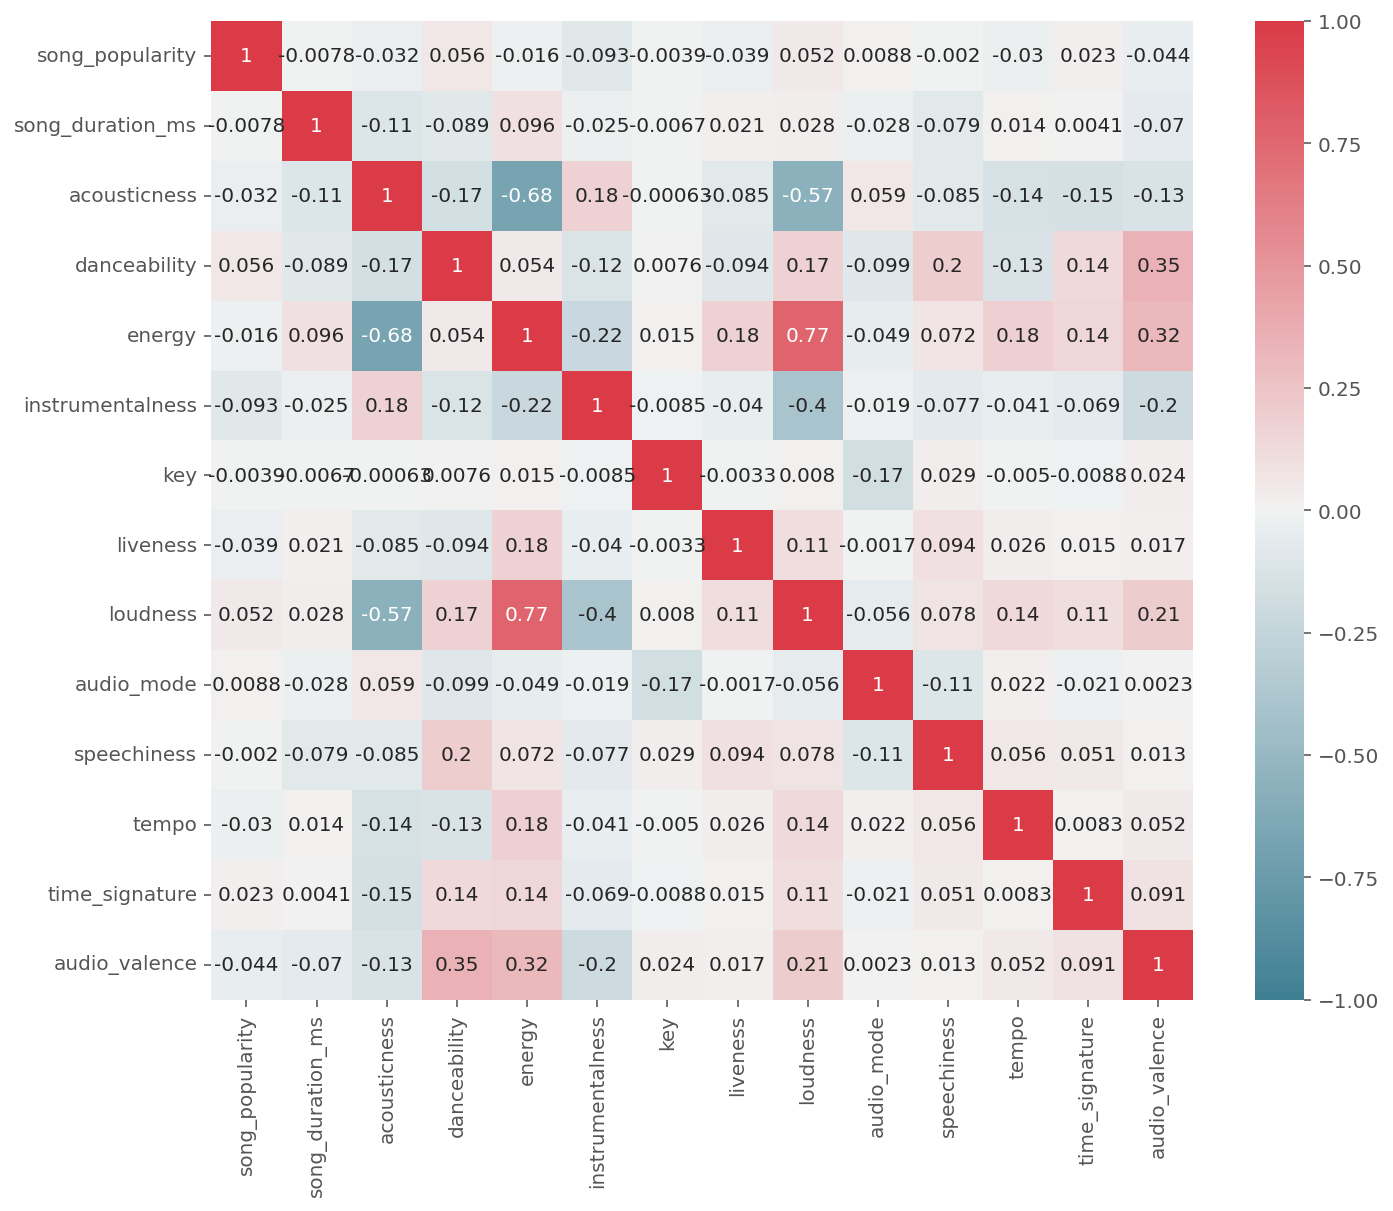

In [63]:
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(songs.corr(), cmap=cmap, annot=True, vmin=-1, vmax=1) ;

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


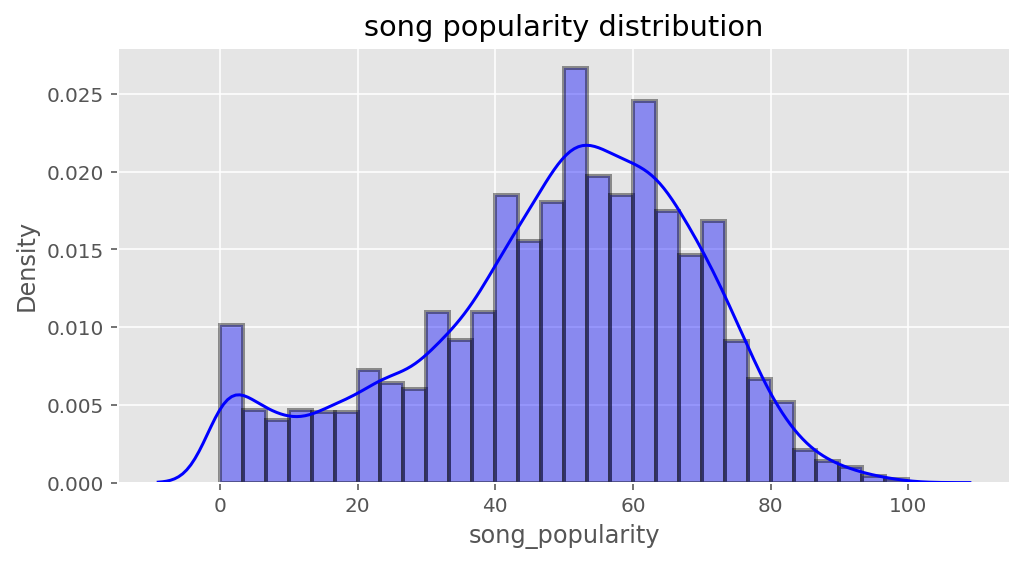

In [64]:
plt.figure(figsize=[8,4])
sns.distplot(songs['song_popularity'], color='b',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('song popularity distribution')
plt.show()

In [65]:
c = songs.corr().abs()

sol = (c.where(np.triu(np.ones(c.shape), k=1).astype(bool))
        .stack()
        .sort_values(ascending=False))

In [66]:
sol[sol>0.5]

energy        loudness    0.765706
acousticness  energy      0.679235
              loudness    0.569681
dtype: float64

In [67]:
def plot_scatter(df, y):
        for i in range(len(df.columns)):
            if df[df.columns[i]].dtype !=  'O':
                plt.figure(figsize=(8,6))
                plt.xlabel(df.columns[i])
                plt.xticks(rotation=90)
                sns.scatterplot(x = df[df.columns[i]], y=y, data=df)
                plt.show()

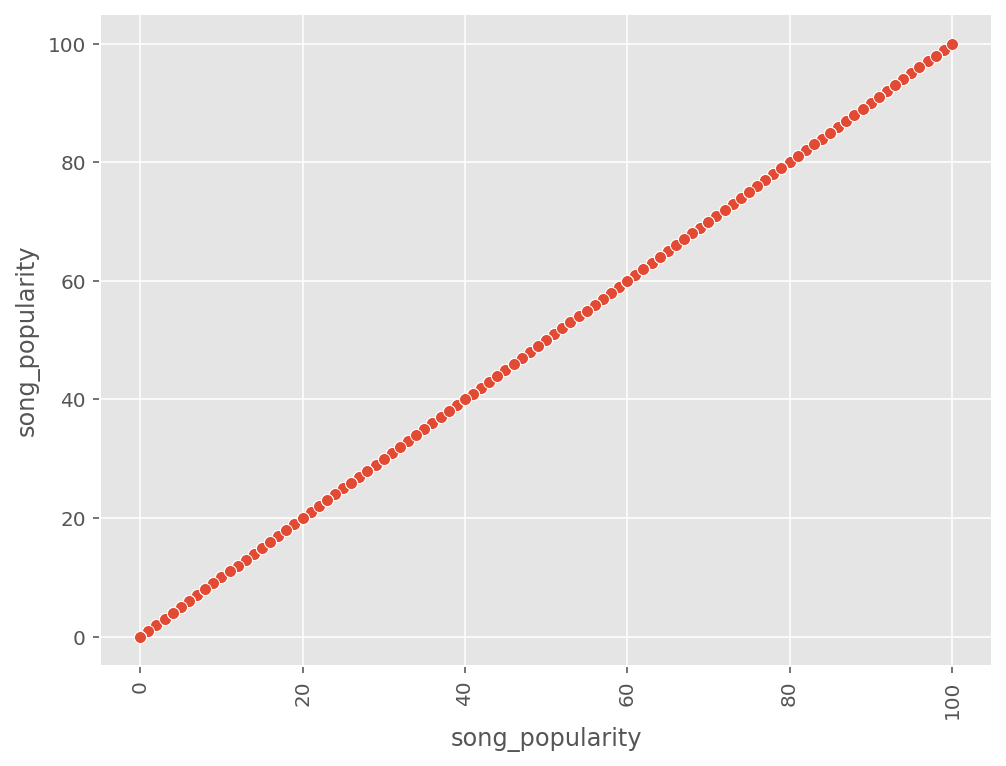

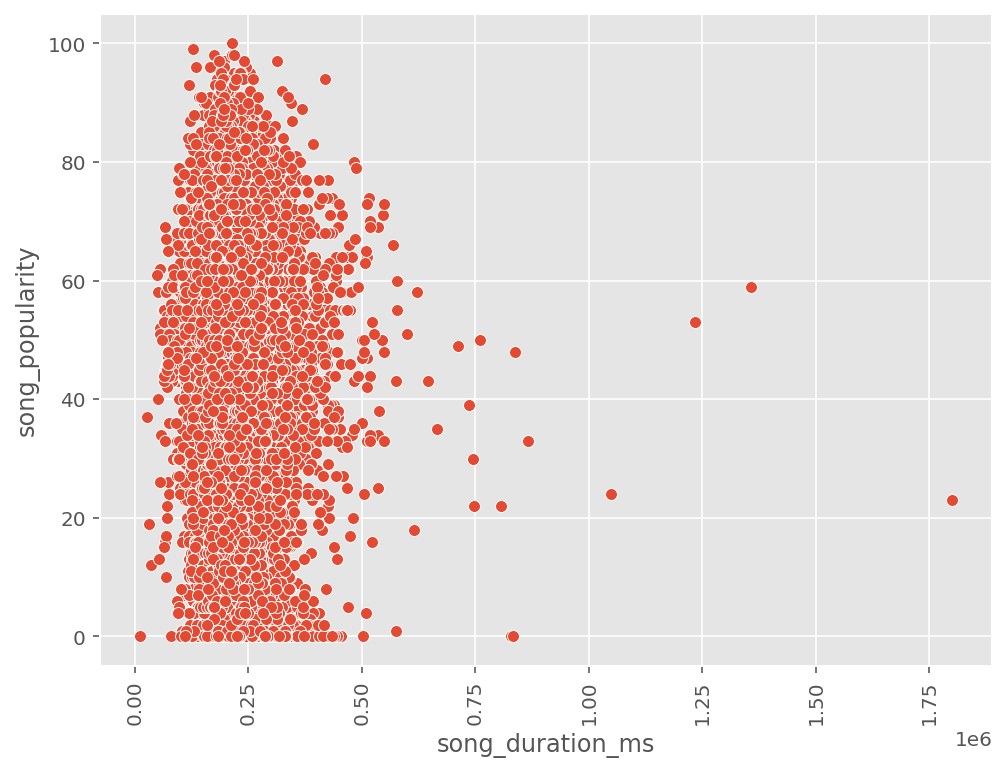

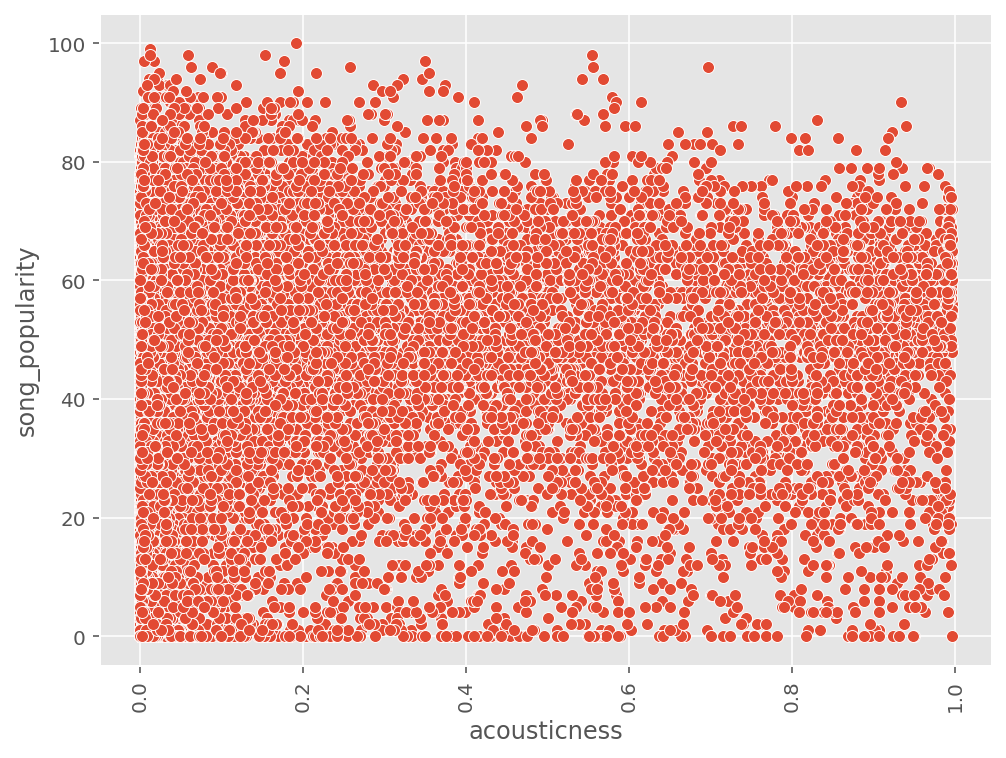

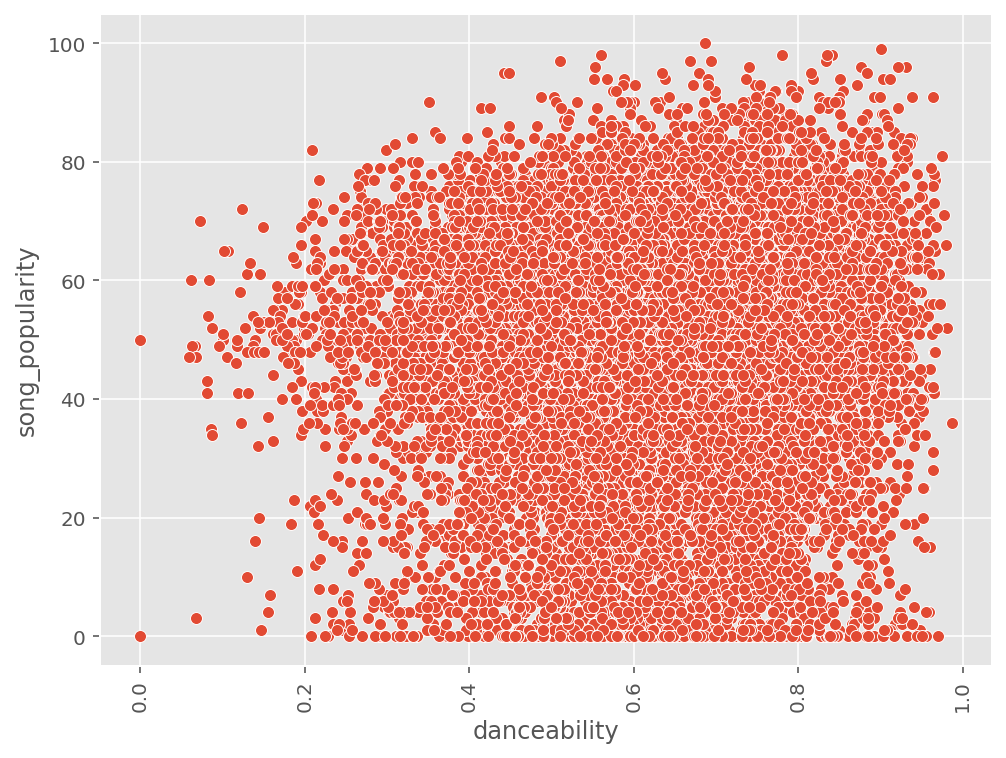

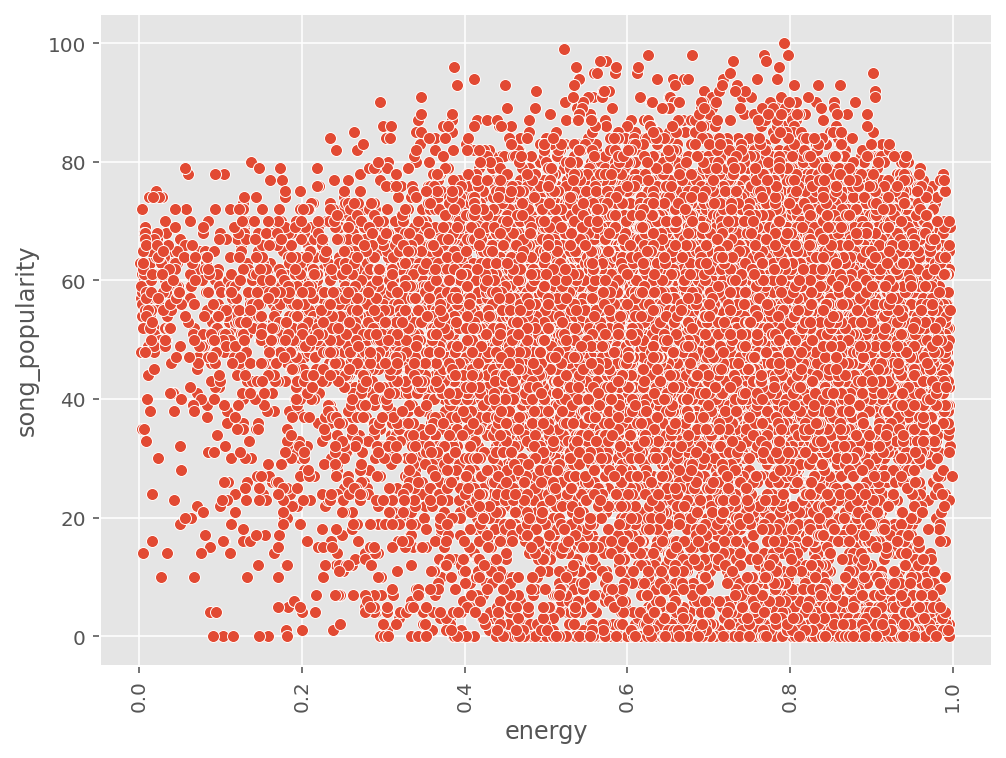

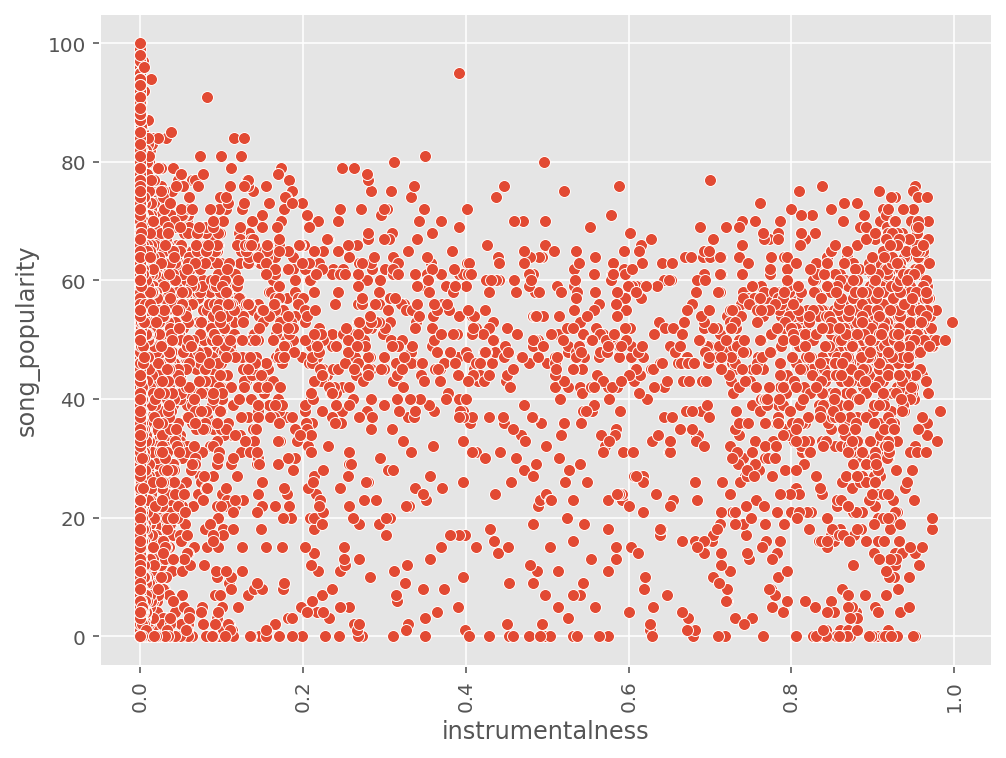

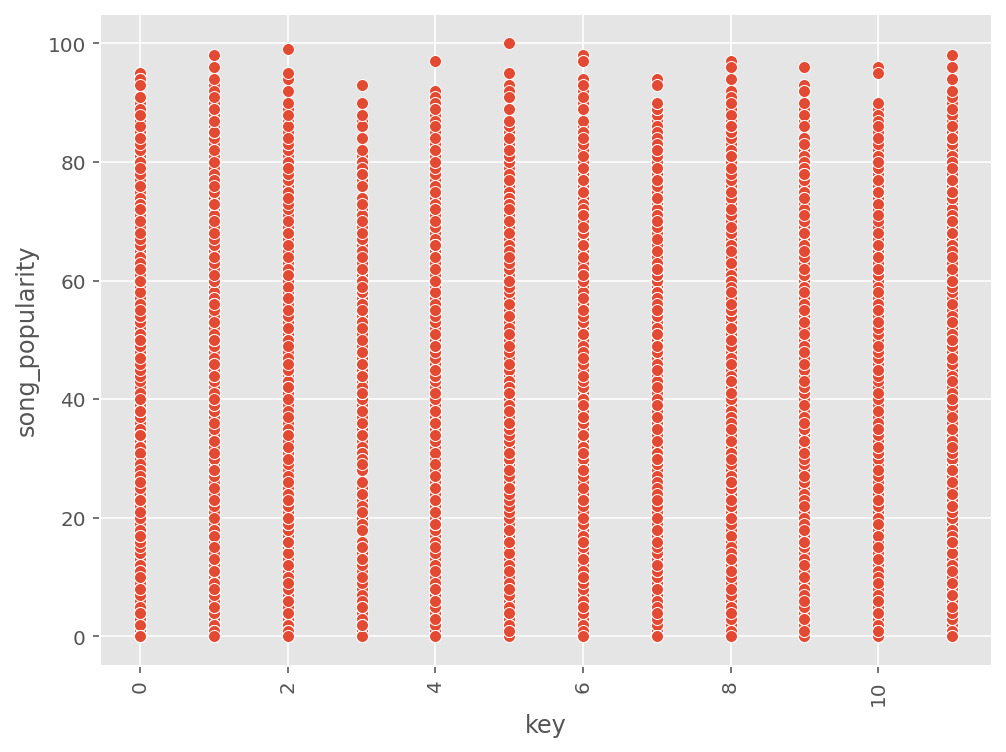

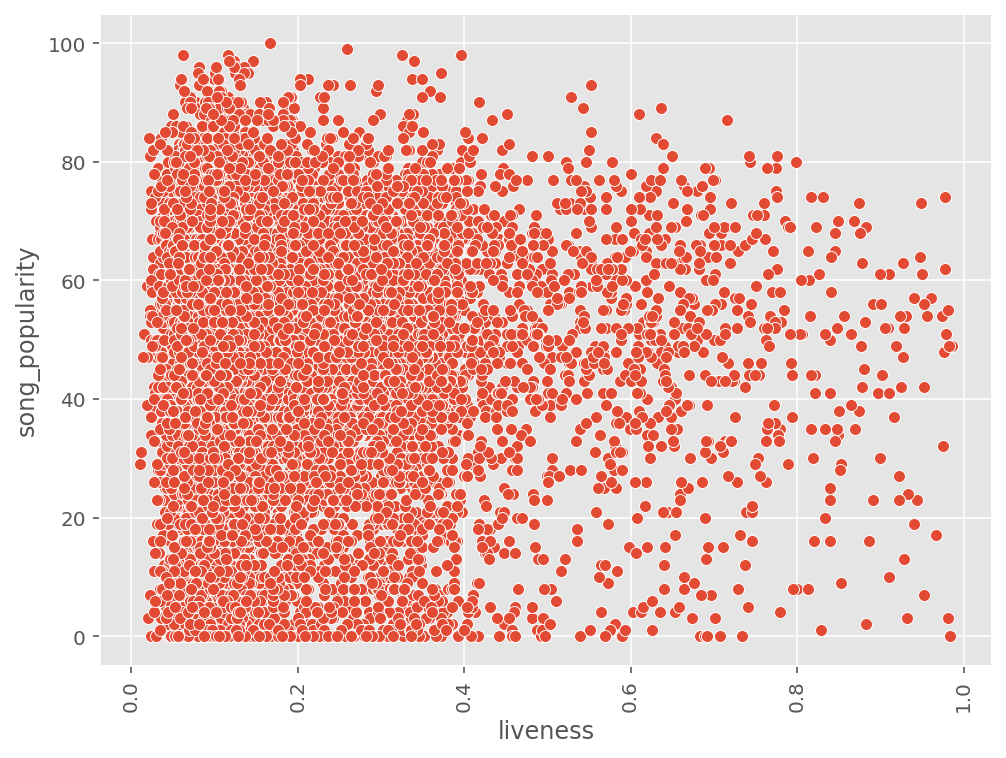

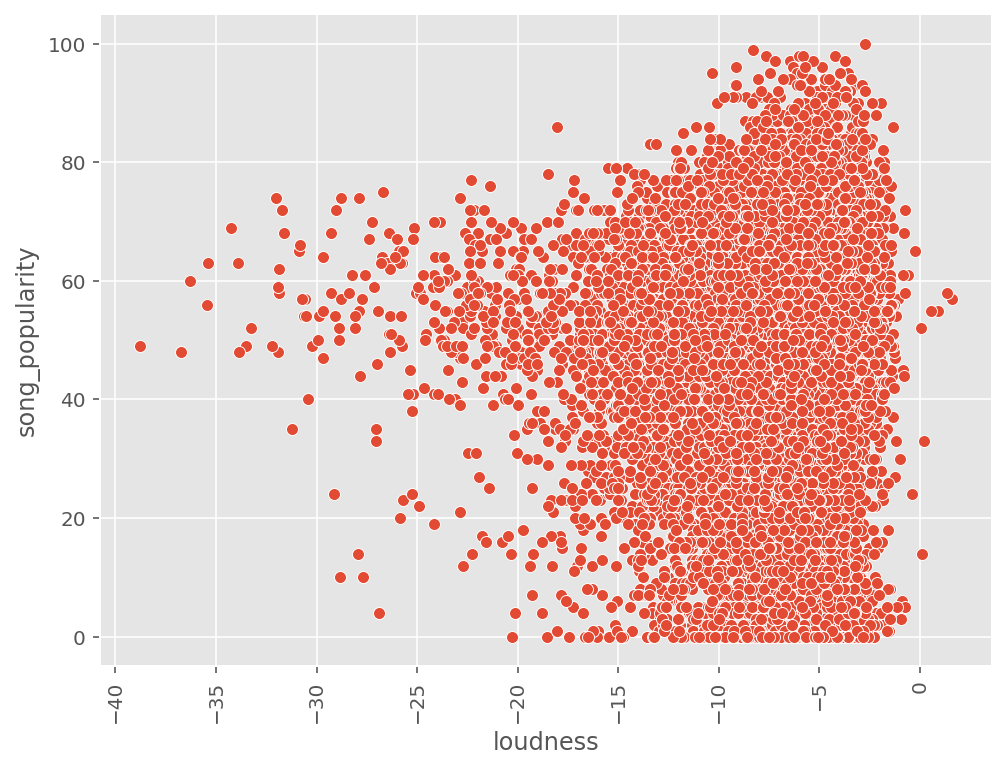

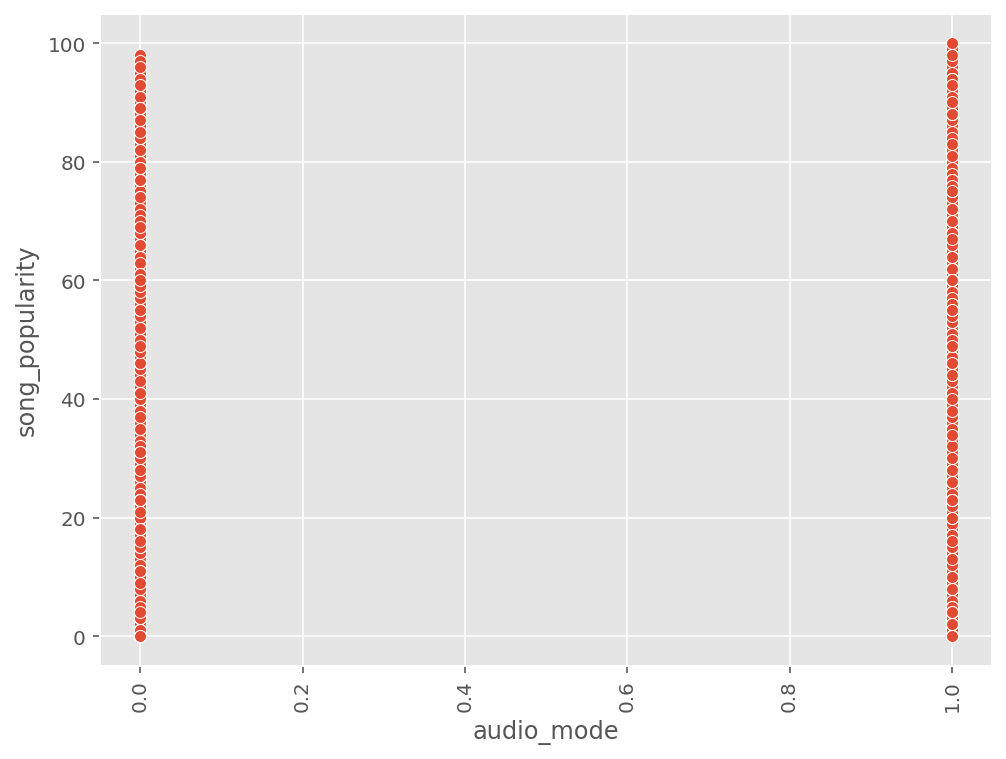

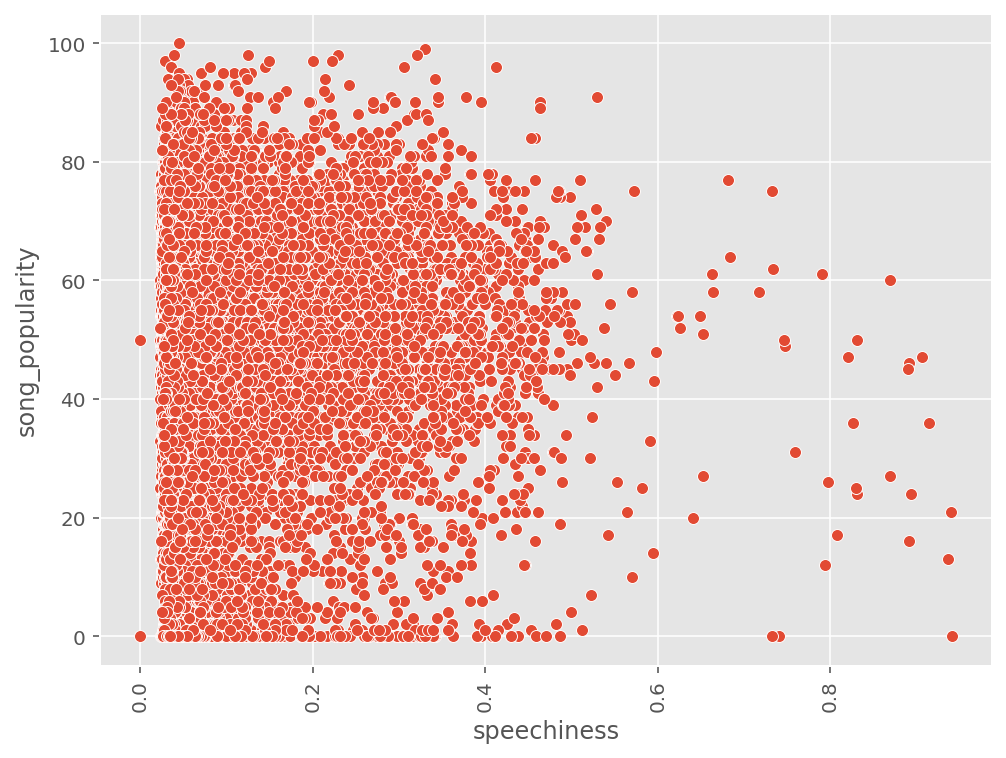

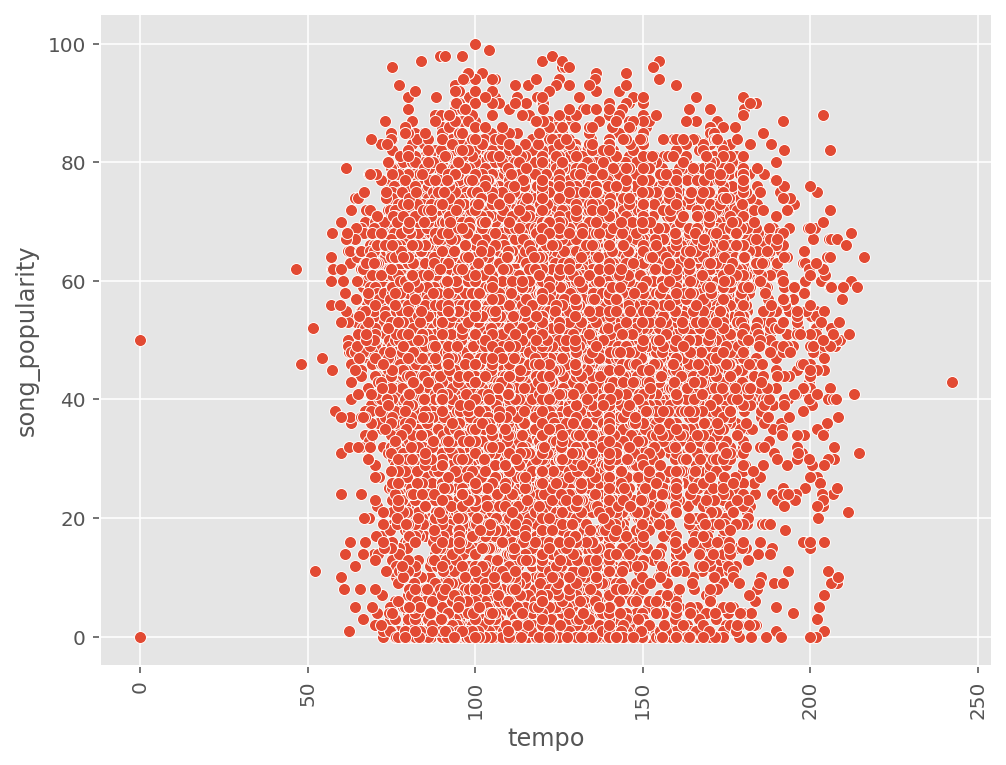

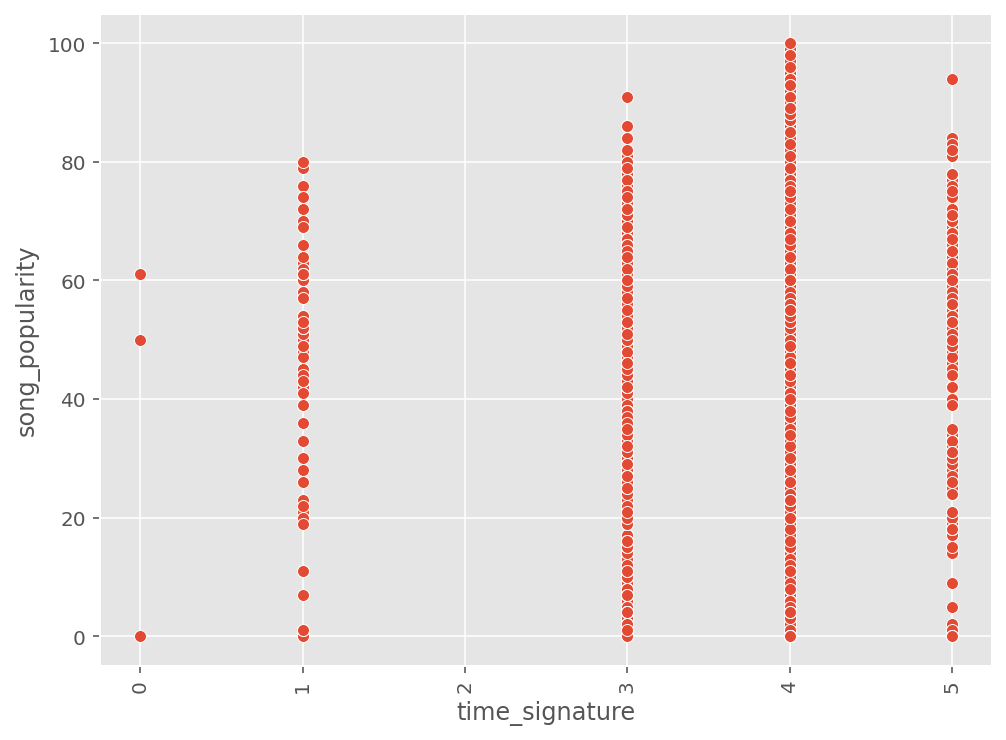

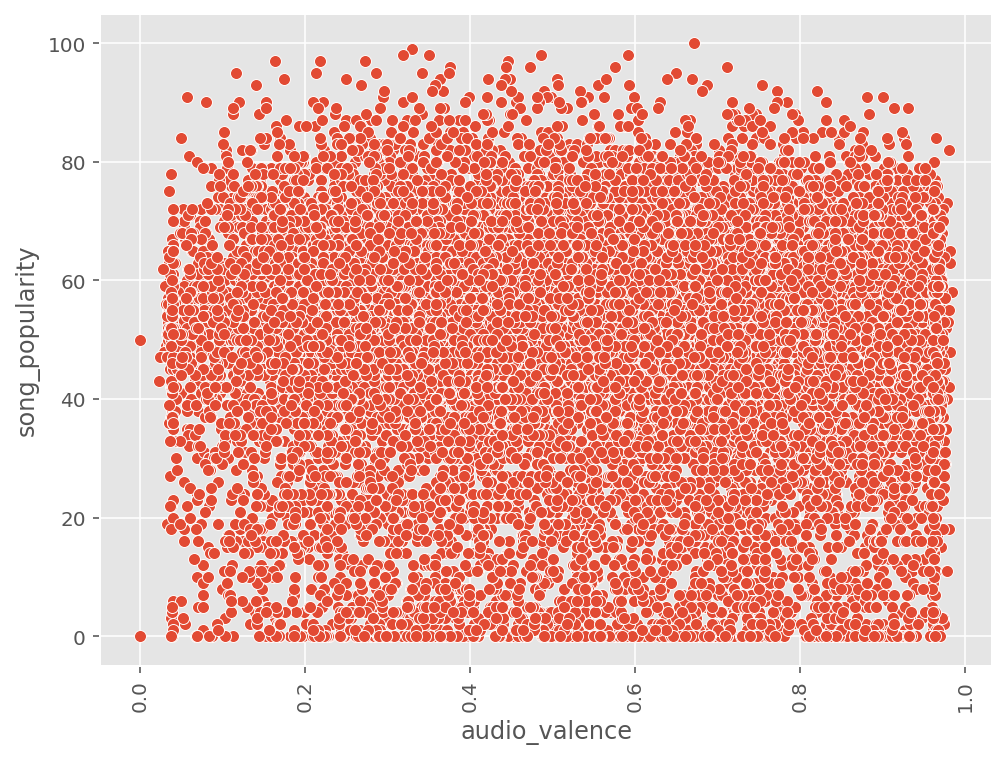

In [68]:
plot_scatter(songs, songs['song_popularity'])

# Regression

In [69]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Choose outcome and predictor variables

In [70]:
y = songs.pop('song_popularity')
X = songs.iloc[:, 1:-1]

Create train-test split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=100)

Scaling the data

In [72]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Linear regression

In [73]:
# create a linear regression model instance
model = LinearRegression()

# get cross validated scores
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model.fit(X_train, y_train)
print("Training Score:", model.score(X_train, y_train))
# evaluate the data on the test set
print("Test Score:", model.score(X_test, y_test))

Cross-validated training scores: [0.0212222  0.01545209 0.0166587  0.01443734 0.01436572]
Mean cross-validated training score: 0.01642720766618877
Training Score: 0.01923745812260802
Test Score: 0.019955618899315186


In [74]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

20.13289913265196

In [75]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(model.coef_, index=X_train.columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef

coefficients  coef_abs
song_duration_ms     -0.042054  0.042054
acousticness         -1.166074  1.166074
danceability          0.307430  0.307430
energy               -2.877268  2.877268
instrumentalness     -1.471934  1.471934
key                   0.105148  0.105148
liveness             -0.558908  0.558908
loudness              2.110363  2.110363
audio_mode            0.029359  0.029359
speechiness          -0.315840  0.315840
tempo                -0.579020  0.579020
time_signature        0.300342  0.300342

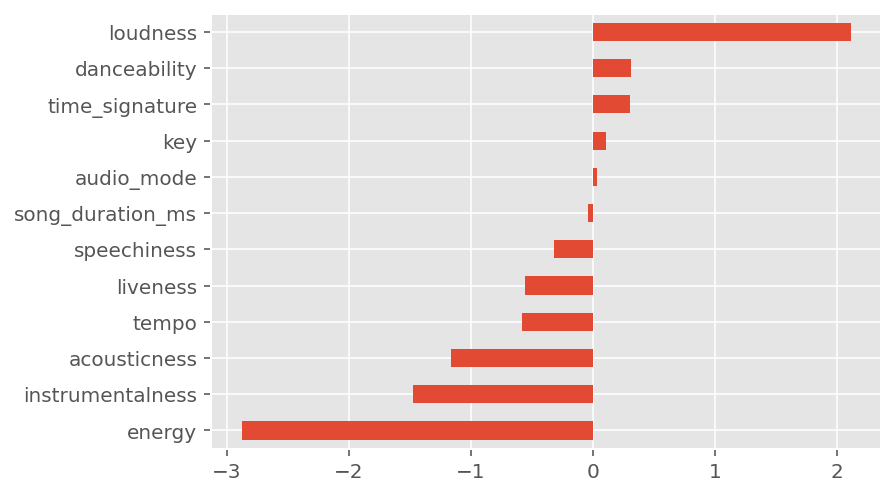

In [76]:
# plot the magnitude of the coefficients
df_coef['coefficients'].sort_values().plot(kind='barh');

RidgeCV

In [77]:
np.logspace(-4, 4, 10)
10**np.linspace(-4, 4, 10)

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [78]:
# create a RidgeCV model instance
model = RidgeCV(alphas=np.logspace(-4, 4, 10), cv=5)
# fit the model
model.fit(X_train, y_train)
# get the best alpha
print('Best alpha:', model.alpha_)
# evaluate on the training set
print('Training score:', model.score(X_train, y_train))
# evaluate on the test set
print("Test Score:", model.score(X_test, y_test))

Best alpha: 166.81005372000558
Training score: 0.019209042060147397
Test Score: 0.01993435469945004


In [79]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(model.coef_, index=X_train.columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef

coefficients  coef_abs
song_duration_ms     -0.045850  0.045850
acousticness         -1.098183  1.098183
danceability          0.329156  0.329156
energy               -2.690789  2.690789
instrumentalness     -1.473701  1.473701
key                   0.101747  0.101747
liveness             -0.561292  0.561292
loudness              1.974442  1.974442
audio_mode            0.028346  0.028346
speechiness          -0.312354  0.312354
tempo                -0.573268  0.573268
time_signature        0.292060  0.292060

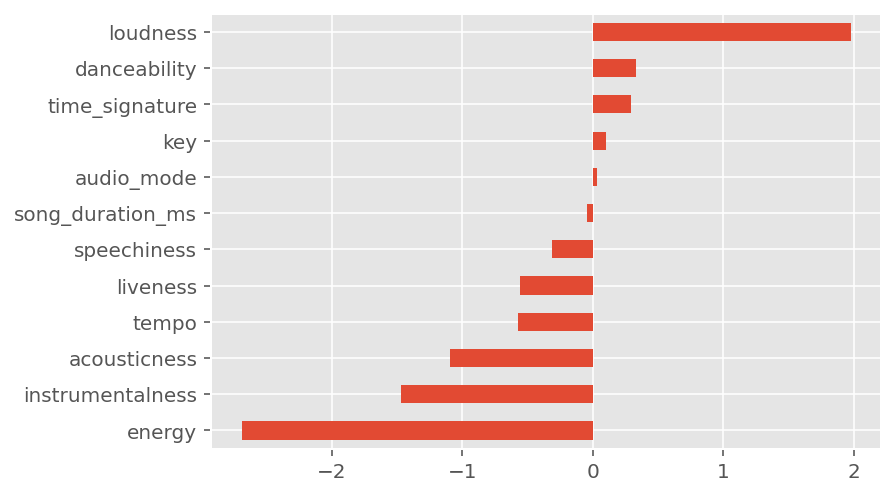

In [80]:
# plot the magnitude of the coefficients
df_coef['coefficients'].sort_values().plot(kind='barh');

In [81]:
alpha = model.alpha_
# create a Ridge model instance
model = Ridge(alpha=alpha)

# get cross validated scores
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model.fit(X_train, y_train)
print("Training Score:", model.score(X_train, y_train))
# evaluate the data on the test set
print("Test Score:", model.score(X_test, y_test))

Cross-validated training scores: [0.02095122 0.01551403 0.01672931 0.01427239 0.01474889]
Mean cross-validated training score: 0.01644316550893199
Training Score: 0.019209042060147397
Test Score: 0.01993435469945004


In [82]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

20.13319079018933

Fit a LassoCV model

In [83]:
# create a LassoCV model instance
model = LassoCV(alphas=np.logspace(-4, 4, 10), cv=5)
# fit the model
model.fit(X_train, y_train)
# get the best alpha
print('Best alpha:', model.alpha_)
# evaluate on the training set
print('Training score:', model.score(X_train, y_train))
# evaluate on the test set
print("Test Score:", model.score(X_test, y_test))

Best alpha: 0.046415888336127774
Training score: 0.019141881274881367
Test Score: 0.01981160088859113


In [84]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(model.coef_, index=X_train.columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef

coefficients  coef_abs
song_duration_ms     -0.000000  0.000000
acousticness         -1.034130  1.034130
danceability          0.307265  0.307265
energy               -2.621273  2.621273
instrumentalness     -1.456631  1.456631
key                   0.050876  0.050876
liveness             -0.533464  0.533464
loudness              1.939128  1.939128
audio_mode            0.000000  0.000000
speechiness          -0.261617  0.261617
tempo                -0.538173  0.538173
time_signature        0.253530  0.253530

In [85]:
alpha = model.alpha_
# create a Lasso model instance
model = Lasso(alpha=alpha)

# get cross validated scores
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model.fit(X_train, y_train)
print("Training Score:", model.score(X_train, y_train))
# evaluate the data on the test set
print("Test Score:", model.score(X_test, y_test))

Cross-validated training scores: [0.02077916 0.01575032 0.01677093 0.01465296 0.01458771]
Mean cross-validated training score: 0.016508214613410167
Training Score: 0.019141881274881367
Test Score: 0.01981160088859113


In [86]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

20.13388010004967

Fit an ElasticNetCV model

In [87]:
# create an ElastinNetCV model instance
model = ElasticNetCV(alphas=np.logspace(-4, 4, 10), 
                     l1_ratio=np.array([.1, .5, .7, .9, .95, .99, 1]),
                     cv=5)
# fit the model
model.fit(X_train, y_train)
# get the best alpha
print('Best alpha:', model.alpha_)
# get the best l1-ratio
print('Best l1-ratio:', model.l1_ratio_)
# evaluate on the training set
print('Training score:', model.score(X_train, y_train))
# evaluate on the test set
print("Test Score:", model.score(X_test, y_test))

Best alpha: 0.046415888336127774
Best l1-ratio: 1.0
Training score: 0.019141881274881367
Test Score: 0.01981160088859113


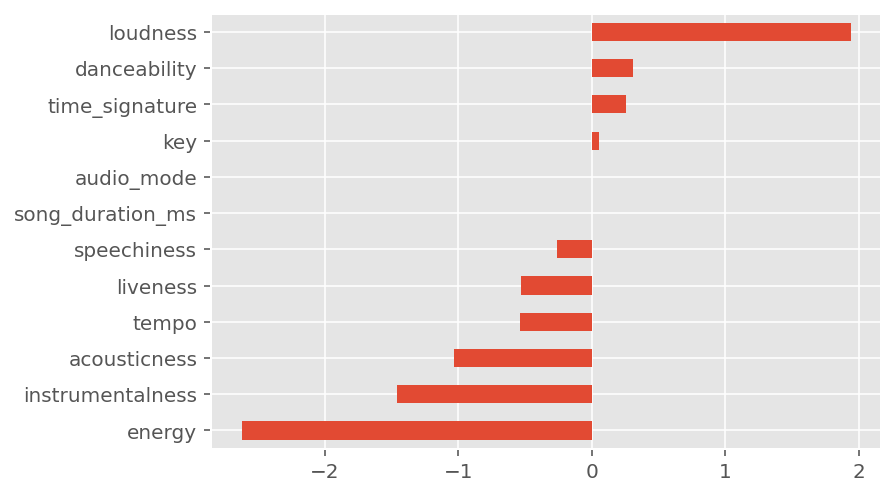

In [88]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(model.coef_, index=X_train.columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef

# plot the magnitude of the coefficients
df_coef['coefficients'].sort_values().plot(kind='barh');

In [89]:
alpha = model.alpha_ 
l1_ratio = model.l1_ratio_
# create an ElasticNet model instance
model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

# get cross validated scores
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model.fit(X_train, y_train)
print("Training Score:", model.score(X_train, y_train))
# evaluate the data on the test set
print("Test Score:", model.score(X_test, y_test))

Cross-validated training scores: [0.02077916 0.01575032 0.01677093 0.01465296 0.01458771]
Mean cross-validated training score: 0.016508214613410167
Training Score: 0.019141881274881367
Test Score: 0.01981160088859113


In [90]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

20.13388010004967